# Создание дашборда по пользовательским событиям для агрегатора новостей

Данные предоставлены сервисом Яндекс.Дзен. Для лучшей работы и ответы на вопросы менеджеров было решено составить дашборд. 

**Задачи исследования** - используя данные Яндекс.Дзена построить дашборд с метриками взаимодействия пользователей с карточками статей и сделать выводы.

**Ход исследования**:
1. Получение ТЗ.
2. Подключение к базе
3. Выгрузка и изучение данных
4. Сохранение данных
5. Создание дашборда в Tableau
6. Ответы на вопросы с выводами  в презентации

## Техническое задание 

Пообщавшись с менеджерами и администраторами баз данных было готово **ТЗ**:

* Для чего? -  Анализ взаимодействия пользователей с карточками Яндекс.Дзен.
* Как часто будут пользоваться? - Не реже, чем раз в неделю.
* Кто основные пользователи дашборда? - Менеджеры по анализу контента.
* Частота обновления данных? - Один раз в сутки, в полночь по UTC.
* Какие данные, откдуа их взять? - Сырые данные о событиях взаимодействия пользователей с карточками, база данных - `zen`.
* Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда)? 

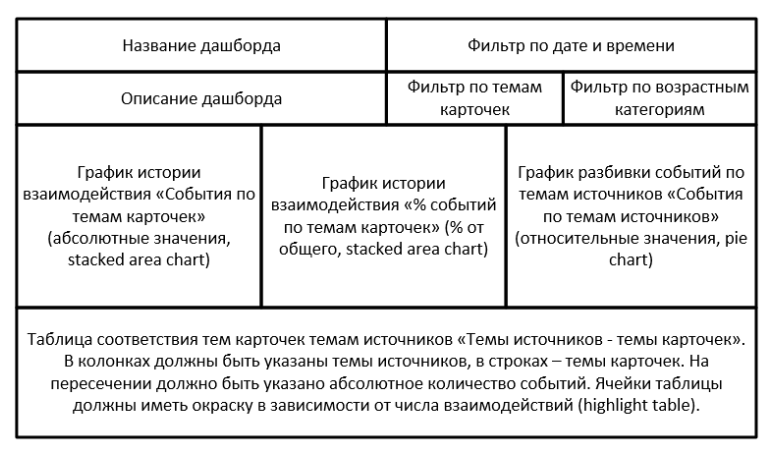

## Подключение к базе

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Задаем параметры подключения к БД

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

In [3]:
# Формируем строку соединения с БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

In [4]:
# Подключаемся к БД
engine = create_engine(connection_string) 

In [5]:
# Формируем sql-запрос
query = ''' SELECT * FROM dash_visits '''

In [6]:
# Выполняем запрос и сохраняем результат выполнения в DataFrame
dash_visits = pd.io.sql.read_sql(query, con = engine) 


## Вывод и изучение данных

In [7]:
# просмотр данных
dash_visits.head(15)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


Мы извлекли нужные нам данные и имеем следующую информацию:

* `record_id` -	идентификатор 
* `item_topic` - тема карточки
* `source_topic` - источник карточки
* `age_segment` - возрастной сегмент
* `dt` - дата
* `visits` - количество визиток

## Сохранение данных

In [9]:
# сохраним данные в csv формате
dash_visits.to_csv('dash_visits.csv')

## Создание дашборда в Tableau

*Ссылка на дашборд* : https://public.tableau.com/app/profile/.85962202/viz/Yandex_Dzen_16490924122890/Yandex_Dzen?publish=yes

## Ответы на вопросы с выводами в презентации

*Ссылка на презентацию* : https://drive.google.com/file/d/1rlZE5qlj7hhRgIfiL26PRHIg9Ggjqf6F/view?usp=sharing